# 2020년 국내 유료 OTT 사용률 
( 출처 : 방송통신위원회 방송통계포털 https://www.mediastat.or.kr/kor/tblInfo/TblInfoList.html?vw_cd=MT_ATITLE)

* 코로나 이후(2019말 이후) OTT 사용 증가.
* 이에따라 증가한 OTT의 사용률 비교. (유료)
* 2019년의 자료가 있었으면 변화를 볼수 있을텐데 아쉬운 점

## output

Text(0.5, 1.0, '2020 국내 유료 OTT 사용률')

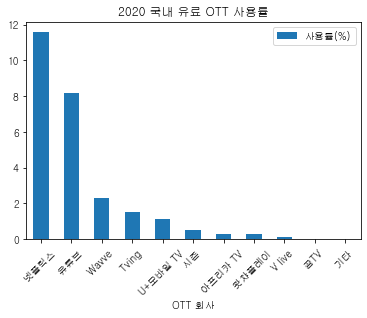

In [163]:
ott_ratio_2020_all.sort_values(by = '사용률(%)',ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.title('2020 국내 유료 OTT 사용률')

code

In [3]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

# matplotlib의 pyplot
import matplotlib.pyplot as plt

# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
# %matplotlib inline 

In [ ]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [58]:
ott_ratio_2020 = pd.read_csv('./data/추가요금을_지불하고_이용한_온라인동영상제공서비스_OTT__2020.csv')
ott_ratio_2020.info()
print(ott_ratio_2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   구분별(2)        10 non-null     object 
 1   사례수 (명)       10 non-null     int64  
 2   U+모바일 TV (%)  10 non-null     float64
 3   Tving (%)     10 non-null     float64
 4   V live (%)    10 non-null     float64
 5   아프리카 TV (%)   10 non-null     float64
 6   왓챠플레이 (%)     10 non-null     float64
 7   곰TV (%)       10 non-null     float64
 8   유튜브 (%)       10 non-null     float64
 9   넷플릭스 (%)      10 non-null     float64
 10  Wavve (%)     10 non-null     float64
 11  시즌 (%)        10 non-null     float64
 12  기타 (%)        10 non-null     float64
 13  이용한적 없음 (%)   10 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.2+ KB
   구분별(2)  사례수 (명)  U+모바일 TV (%)  Tving (%)  V live (%)  아프리카 TV (%)  \
0      소계     3999           1.1        1.5         0.1          0.3   
1  

In [76]:
ott_ratio_2020[ott_ratio_2020['구분별(2)']== '소계'].iloc[:,2:-1]

,U+모바일 TV (%),Tving (%),V live (%),아프리카 TV (%),왓챠플레이 (%),곰TV (%),유튜브 (%),넷플릭스 (%),Wavve (%),시즌 (%),기타 (%)
0,1.1,1.5,0.1,0.3,0.3,0.0,8.2,11.6,2.3,0.5,0.0


In [79]:
ott_ratio_2020[ott_ratio_2020['구분별(2)']== '소계'].iloc[:,2:-1].T

,0
U+모바일 TV (%),1.1
Tving (%),1.5
V live (%),0.1
아프리카 TV (%),0.3
왓챠플레이 (%),0.3
곰TV (%),0.0
유튜브 (%),8.2
넷플릭스 (%),11.6
Wavve (%),2.3
시즌 (%),0.5


<AxesSubplot:>

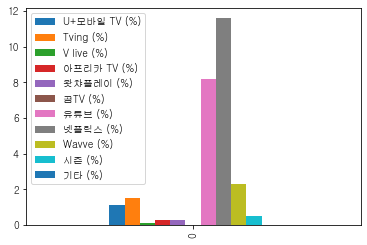

In [140]:
ott_ratio_2020[ott_ratio_2020['구분별(2)']== '소계'].iloc[:,2:-1].plot.bar()

# OTT 회사들의 '(%)' 지우기


In [84]:
ott_ratio_2020[ott_ratio_2020['구분별(2)']== '소계'].iloc[:,2:-1].T.reset_index()

,index,0
0,U+모바일 TV (%),1.1
1,Tving (%),1.5
2,V live (%),0.1
3,아프리카 TV (%),0.3
4,왓챠플레이 (%),0.3
5,곰TV (%),0.0
6,유튜브 (%),8.2
7,넷플릭스 (%),11.6
8,Wavve (%),2.3
9,시즌 (%),0.5


In [110]:
import re

In [155]:
ott_ratio_2020_all=ott_ratio_2020[ott_ratio_2020['구분별(2)']== '소계'].iloc[:,2:-1].T.reset_index()
ott_ratio_2020_all['index'] = ott_ratio_2020_all['index'].str.replace(pat=r'[(%)]', repl=r'', regex=True)#(%) 제거 
#특문 전체를 제거하고싶다면 pat=r'[^\w]' 사용, 여기서는 U+모바일 에 + 도 같이 제거되어 따로 설정

In [156]:
ott_ratio_2020_all

,index,0
0,U+모바일 TV,1.1
1,Tving,1.5
2,V live,0.1
3,아프리카 TV,0.3
4,왓챠플레이,0.3
5,곰TV,0.0
6,유튜브,8.2
7,넷플릭스,11.6
8,Wavve,2.3
9,시즌,0.5


In [157]:
ott_ratio_2020_all=ott_ratio_2020_all.rename(columns={'index' : 'OTT 회사', 0:'사용률(%)'})

In [158]:
ott_ratio_2020_all=ott_ratio_2020_all.set_index('OTT 회사')

<AxesSubplot:xlabel='OTT 회사'>

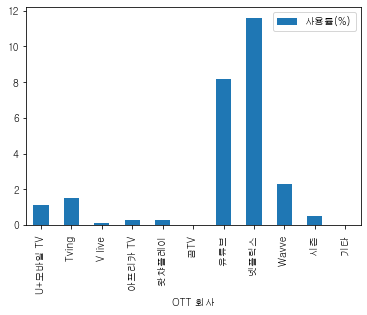

In [159]:
ott_ratio_2020_all.plot.bar()

Text(0.5, 1.0, '2020 국내 유료 OTT 사용률')

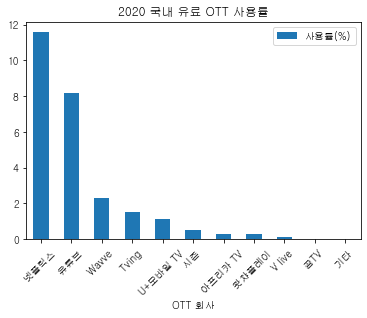

In [161]:
ott_ratio_2020_all.sort_values(by = '사용률(%)',ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.title('2020 국내 유료 OTT 사용률')

# truoble

In [18]:
# 인덱스 깔끔하게 정리
ott_ratio_2020 = ott_ratio_2020.set_index('구분별(2)')
ott_ratio_2020

,사례수 (명),U+모바일 TV (%),Tving (%),V live (%),아프리카 TV (%),왓챠플레이 (%),곰TV (%),유튜브 (%),넷플릭스 (%),Wavve (%),시즌 (%),기타 (%),이용한적 없음 (%)
구분별(2),,,,,,,,,,,,,
소계,3999,1.1,1.5,0.1,0.3,0.3,0.0,8.2,11.6,2.3,0.5,0.0,78.3
남자,2087,1.3,1.9,0.0,0.4,0.2,0.0,9.1,10.8,2.5,0.4,0.0,77.3
여자,1912,0.8,1.1,0.3,0.1,0.5,0.1,7.2,12.4,2.2,0.6,0.1,79.3
10대,453,3.1,1.1,0.0,0.5,0.1,0.0,6.1,11.4,0.9,2.1,0.0,79.6
20대,835,1.7,2.1,0.6,0.7,1.2,0.0,11.7,18.1,5.1,0.8,0.0,66.6
30대,831,0.9,2.8,0.0,0.1,0.3,0.1,8.6,20.2,4.2,0.4,0.0,69.9
40대,800,0.9,0.7,0.0,0.0,0.0,0.0,7.6,7.6,0.9,0.0,0.0,82.4
50대,713,0.0,1.3,0.0,0.1,0.0,0.0,6.1,3.4,0.6,0.0,0.2,89.6
60대,294,0.0,0.0,0.0,0.0,0.0,0.0,7.3,1.5,0.0,0.0,0.0,91.3


In [19]:
ott_ratio_2020.loc[['소계']]

,사례수 (명),U+모바일 TV (%),Tving (%),V live (%),아프리카 TV (%),왓챠플레이 (%),곰TV (%),유튜브 (%),넷플릭스 (%),Wavve (%),시즌 (%),기타 (%),이용한적 없음 (%)
구분별(2),,,,,,,,,,,,,
소계,3999,1.1,1.5,0.1,0.3,0.3,0.0,8.2,11.6,2.3,0.5,0.0,78.3


# 소계, 사례수 문제
# 이용한적없음(%) 값이 너무 커 다른 값들의 차이를 보기 힘듬

Text(0, 0.5, '점유율 (%)')

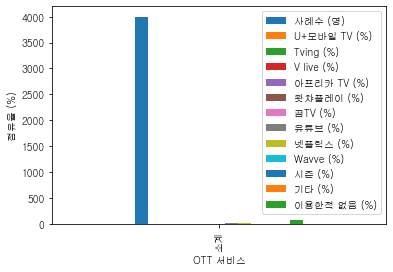

In [23]:
ott_ratio_2020.loc[['소계']].plot.bar()
plt.xlabel("OTT 서비스")
plt.ylabel('점유율 (%)')


In [53]:
ott_ratio_2020.loc[['소계']].iloc[:,1:-1].style.hide_index()
# AttributeError: 'Styler' object has no attribute 'plot'
# 이상태로는 plot.bar 불가

U+모바일 TV (%),Tving (%),V live (%),아프리카 TV (%),왓챠플레이 (%),곰TV (%),유튜브 (%),넷플릭스 (%),Wavve (%),시즌 (%),기타 (%)
1.100000,1.500000,0.100000,0.300000,0.300000,0.000000,8.200000,11.600000,2.300000,0.500000,0.000000


In [ ]:
ott_ratio_2020.loc[['소계']].iloc[:,1:-1].style.hide_index().plot.bar()

ott_ratio_2020 = ott_ratio_2020.set_index('구분별(2)')
멀티인덱스 보기는 좋지만, 내가 단순히 원하는 부분을 가져오고 나서는 힘들어짐.(공부 부족)